<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

# Imports

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Ftrl, Adam



### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

#### Train_Validate_Test split function for .npz (zip file)

In [2]:
def split_zip_df(path):
  data = np.load(path)
  features = 'arr_0'
  target = 'arr_1'
  X = data[features]
  y = data[target]
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.20,
      stratify= y,
      random_state=17)
  X_train, X_val, y_train, y_val = train_test_split(
      X_train, y_train, test_size=0.20,
      stratify= y_train,
      random_state=17)

  return X_train, y_train, X_val, y_val, X_test, y_test

  
X_train, y_train, X_val, y_val, X_test, y_test = split_zip_df('quickdraw10.npz')

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((64000, 784), (64000,), (16000, 784), (16000,), (20000, 784), (20000,))

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [3]:
def create_model(lr, opt): #lr = Learning rate, opt = optimizer
  model = Sequential([
                      Dense(32, activation='relu', input_dim=784),
                      Dense(32, activation='relu'),
                      Dense(16, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  opt = opt(learning_rate = lr)
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [4]:
model = create_model(lr = 0.01, opt = SGD)
bt_largest = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=512,
    validation_data=(X_val,y_val))


Epoch 1/25
125/125 [==============================] - 0s 4ms/step - loss: 23.7900 - accuracy: 0.0990 - val_loss: 2.3427 - val_accuracy: 0.0991
Epoch 2/25
125/125 [==============================] - 0s 3ms/step - loss: 2.3013 - accuracy: 0.0980 - val_loss: 2.3237 - val_accuracy: 0.0999
Epoch 3/25
125/125 [==============================] - 0s 3ms/step - loss: 2.1930 - accuracy: 0.1588 - val_loss: 2.1697 - val_accuracy: 0.1829
Epoch 4/25
125/125 [==============================] - 0s 3ms/step - loss: 2.1304 - accuracy: 0.1848 - val_loss: 2.1189 - val_accuracy: 0.1934
Epoch 5/25
125/125 [==============================] - 0s 3ms/step - loss: 2.1012 - accuracy: 0.1881 - val_loss: 2.1005 - val_accuracy: 0.1935
Epoch 6/25
125/125 [==============================] - 0s 3ms/step - loss: 2.0480 - accuracy: 0.1945 - val_loss: 2.0625 - val_accuracy: 0.1901
Epoch 7/25
125/125 [==============================] - 0s 3ms/step - loss: 2.0203 - accuracy: 0.1978 - val_loss: 2.0478 - val_accuracy: 0.1902
Epoch

In [30]:
model = create_model(lr = 0.01, opt = SGD)
bt_large = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=256,
    validation_data=(X_val,y_val))

Epoch 1/25
250/250 [==============================] - 1s 3ms/step - loss: 6.7108 - accuracy: 0.0979 - val_loss: 2.3031 - val_accuracy: 0.1002
Epoch 2/25
250/250 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.0969 - val_loss: 2.3027 - val_accuracy: 0.1004
Epoch 3/25
250/250 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.0978 - val_loss: 2.3023 - val_accuracy: 0.1006
Epoch 4/25
250/250 [==============================] - 1s 2ms/step - loss: 2.3006 - accuracy: 0.1005 - val_loss: 2.2971 - val_accuracy: 0.1044
Epoch 5/25
250/250 [==============================] - 1s 2ms/step - loss: 2.2855 - accuracy: 0.1131 - val_loss: 2.2623 - val_accuracy: 0.1356
Epoch 6/25
250/250 [==============================] - 1s 2ms/step - loss: 2.2241 - accuracy: 0.1547 - val_loss: 2.1885 - val_accuracy: 0.1706
Epoch 7/25
250/250 [==============================] - 1s 2ms/step - loss: 2.1515 - accuracy: 0.1787 - val_loss: 2.1187 - val_accuracy: 0.1848
Epoch 

In [6]:
model = create_model(lr = 0.01, opt = SGD)
bt_default = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=128,
    validation_data=(X_val,y_val))

Epoch 1/25
500/500 [==============================] - 1s 2ms/step - loss: 5.1392 - accuracy: 0.1117 - val_loss: 2.2979 - val_accuracy: 0.1298
Epoch 2/25
500/500 [==============================] - 1s 2ms/step - loss: 2.2930 - accuracy: 0.1334 - val_loss: 2.2881 - val_accuracy: 0.1398
Epoch 3/25
500/500 [==============================] - 1s 2ms/step - loss: 2.1849 - accuracy: 0.1916 - val_loss: 2.0636 - val_accuracy: 0.2412
Epoch 4/25
500/500 [==============================] - 1s 2ms/step - loss: 1.9921 - accuracy: 0.2679 - val_loss: 1.8209 - val_accuracy: 0.3278
Epoch 5/25
500/500 [==============================] - 1s 2ms/step - loss: 1.7851 - accuracy: 0.3379 - val_loss: 1.7311 - val_accuracy: 0.3461
Epoch 6/25
500/500 [==============================] - 1s 2ms/step - loss: 1.7044 - accuracy: 0.3556 - val_loss: 1.6639 - val_accuracy: 0.3689
Epoch 7/25
500/500 [==============================] - 1s 2ms/step - loss: 1.6529 - accuracy: 0.3706 - val_loss: 1.6608 - val_accuracy: 0.3557
Epoch 

In [7]:
model = create_model(lr = 0.01, opt = SGD)
bt_small = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=64,
    validation_data=(X_val,y_val))

Epoch 1/25
1000/1000 [==============================] - 2s 2ms/step - loss: 3.1309 - accuracy: 0.1080 - val_loss: 2.2597 - val_accuracy: 0.1254
Epoch 2/25
1000/1000 [==============================] - 2s 2ms/step - loss: 2.2047 - accuracy: 0.1531 - val_loss: 2.0481 - val_accuracy: 0.2296
Epoch 3/25
1000/1000 [==============================] - 2s 2ms/step - loss: 1.9567 - accuracy: 0.2572 - val_loss: 1.8926 - val_accuracy: 0.2743
Epoch 4/25
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6458 - accuracy: 0.3879 - val_loss: 1.4187 - val_accuracy: 0.5087
Epoch 5/25
1000/1000 [==============================] - 2s 2ms/step - loss: 1.3194 - accuracy: 0.5224 - val_loss: 1.2741 - val_accuracy: 0.5344
Epoch 6/25
1000/1000 [==============================] - 2s 2ms/step - loss: 1.2158 - accuracy: 0.5694 - val_loss: 1.1975 - val_accuracy: 0.6095
Epoch 7/25
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1506 - accuracy: 0.6050 - val_loss: 1.1534 - val_accuracy:

In [32]:
lr = 0.01
model = create_model(lr = lr, opt = SGD)
bt_smallest = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.7200 - accuracy: 0.1193 - val_loss: 2.2830 - val_accuracy: 0.1114
Epoch 2/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.2527 - accuracy: 0.1297 - val_loss: 2.2065 - val_accuracy: 0.1480
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.1579 - accuracy: 0.1842 - val_loss: 2.1334 - val_accuracy: 0.1951
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.1360 - accuracy: 0.2006 - val_loss: 2.1639 - val_accuracy: 0.1699
Epoch 5/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.1315 - accuracy: 0.1754 - val_loss: 2.0921 - val_accuracy: 0.1909
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.0112 - accuracy: 0.2020 - val_loss: 1.9437 - val_accuracy: 0.2067
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.9241 - accuracy: 0.2053 - val_loss: 1.9068 - val_accuracy:

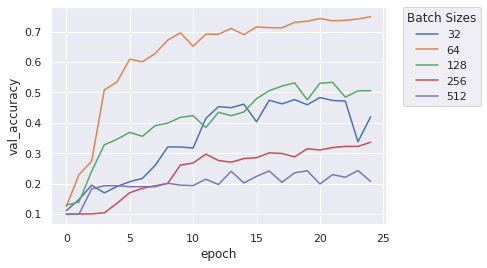

In [33]:
batch_sizes = []
for exp, result in zip([bt_smallest, bt_small, bt_default, bt_large, bt_largest], ["32", "64", "128", "256", "512"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result
    batch_sizes.append(df)
df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')

sns.set(style="darkgrid")
sns.lineplot(x='epoch', y='val_accuracy', hue = 'Batch Size', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title = 'Batch Sizes')

After experimentation with several batch sizes, I have concluded that 32 is the best 
batch size of the 5 values tried. The largest batch sizes increased accuracy consistantly 
but at a much slower rate. The others both dropped off in their performance over the 
later epochs and never reached the accuracy levels of batch siz 32. Even smaller batch 
sizes could yeild better results.

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [10]:
lr = 1
model = create_model(lr = lr, opt = SGD)
lr_largest = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 5s 2ms/step - loss: 57176795645570715746304.0000 - accuracy: 0.1004 - val_loss: 2.3136 - val_accuracy: 0.1000
Epoch 2/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3103 - accuracy: 0.0997 - val_loss: 2.3078 - val_accuracy: 0.1000
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3103 - accuracy: 0.1004 - val_loss: 2.3102 - val_accuracy: 0.1000
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3097 - accuracy: 0.0995 - val_loss: 2.3094 - val_accuracy: 0.1000
Epoch 5/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3096 - accuracy: 0.1025 - val_loss: 2.3071 - val_accuracy: 0.1000
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3099 - accuracy: 0.1001 - val_loss: 2.3091 - val_accuracy: 0.1000
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3106 - accuracy: 0.0978 - val_loss: 

In [11]:
lr = 0.1
model = create_model(lr = lr, opt = SGD)
lr_large = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1943443615099167600289478743162880.0000 - accuracy: 0.0983 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3032 - accuracy: 0.1011 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3032 - accuracy: 0.1001 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3032 - accuracy: 0.0988 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 5/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3035 - accuracy: 0.0966 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3033 - accuracy: 0.1000 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3034 - accuracy: 0.0990 -

In [12]:
lr = 0.01
model = create_model(lr = lr, opt = SGD)
lr_default = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 4s 2ms/step - loss: 8.0172 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy:

In [13]:
lr = 0.001
model = create_model(lr = lr, opt = SGD)
lr_small = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.2750 - accuracy: 0.1747 - val_loss: 2.0572 - val_accuracy: 0.2356
Epoch 2/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.9820 - accuracy: 0.2586 - val_loss: 1.9382 - val_accuracy: 0.2804
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.8756 - accuracy: 0.3038 - val_loss: 1.8227 - val_accuracy: 0.3267
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.7987 - accuracy: 0.3286 - val_loss: 1.7836 - val_accuracy: 0.3331
Epoch 5/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.7584 - accuracy: 0.3368 - val_loss: 1.7558 - val_accuracy: 0.3404
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.7189 - accuracy: 0.3526 - val_loss: 1.6893 - val_accuracy: 0.3747
Epoch 7/25
2000/2000 [==============================] - 5s 2ms/step - loss: 1.6409 - accuracy: 0.3903 - val_loss: 1.6131 - val_accuracy:

In [14]:
lr = 0.0001
model = create_model(lr = lr, opt = SGD)
lr_smallest = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 4s 2ms/step - loss: 3.0708 - accuracy: 0.1310 - val_loss: 2.2429 - val_accuracy: 0.1542
Epoch 2/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.2020 - accuracy: 0.1760 - val_loss: 2.1871 - val_accuracy: 0.1869
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.1556 - accuracy: 0.1936 - val_loss: 2.1608 - val_accuracy: 0.1899
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.1313 - accuracy: 0.1998 - val_loss: 2.1427 - val_accuracy: 0.2018
Epoch 5/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.1109 - accuracy: 0.2120 - val_loss: 2.1248 - val_accuracy: 0.2177
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.0922 - accuracy: 0.2220 - val_loss: 2.1078 - val_accuracy: 0.2253
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.0737 - accuracy: 0.2290 - val_loss: 2.0910 - val_accuracy:

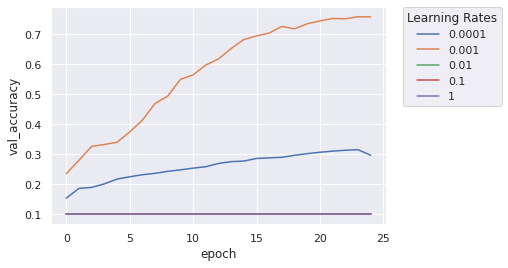

In [15]:
learning_rates = []
for exp, result in zip([lr_smallest, lr_small, lr_default, lr_large, lr_largest], ["0.0001", "0.001", "0.01", "0.1", "1"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result
    learning_rates.append(df)
df = pd.concat(learning_rates)
df['Learning Rate'] = df['Learning Rate'].astype('str')

sns.set(style="darkgrid")
sns.lineplot(x='epoch', y='val_accuracy', hue = 'Learning Rate', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title = 'Learning Rates')

The learning rate 0.001 yeilds the best results by far with the SGD optimizer. The
 lower learning rate steps up entirerly too slowly, and higher learning rates seem to 
 reverse their positive effects on accuracy or have no influence at all on accuracy. I found 
 these results to be consistant over several runs of these tests. 

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [34]:
lr = 0.001
model = create_model(lr = lr, opt = Adam)
opt_Adam = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=64, #changed from 32 for fastrer speeds and similar results)
    validation_data=(X_val,y_val))

Epoch 1/25
1000/1000 [==============================] - 2s 2ms/step - loss: 2.1458 - accuracy: 0.4798 - val_loss: 1.1881 - val_accuracy: 0.6126
Epoch 2/25
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0632 - accuracy: 0.6445 - val_loss: 0.9918 - val_accuracy: 0.6775
Epoch 3/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9194 - accuracy: 0.6982 - val_loss: 0.8713 - val_accuracy: 0.7236
Epoch 4/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8119 - accuracy: 0.7472 - val_loss: 0.7996 - val_accuracy: 0.7520
Epoch 5/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7482 - accuracy: 0.7710 - val_loss: 0.7536 - val_accuracy: 0.7724
Epoch 6/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7062 - accuracy: 0.7855 - val_loss: 0.7314 - val_accuracy: 0.7785
Epoch 7/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6812 - accuracy: 0.7938 - val_loss: 0.7160 - val_accuracy:

In [17]:
lr = 0.001
model = create_model(lr = lr, opt = Ftrl)
opt_Ftrl = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 5s 2ms/step - loss: 2.7152 - accuracy: 0.1867 - val_loss: 1.9920 - val_accuracy: 0.2615
Epoch 2/25
2000/2000 [==============================] - 5s 2ms/step - loss: 1.9301 - accuracy: 0.2758 - val_loss: 1.8886 - val_accuracy: 0.2867
Epoch 3/25
2000/2000 [==============================] - 5s 2ms/step - loss: 1.8559 - accuracy: 0.2895 - val_loss: 1.8330 - val_accuracy: 0.2949
Epoch 4/25
2000/2000 [==============================] - 5s 3ms/step - loss: 1.7910 - accuracy: 0.3130 - val_loss: 1.7611 - val_accuracy: 0.3307
Epoch 5/25
2000/2000 [==============================] - 5s 2ms/step - loss: 1.7264 - accuracy: 0.3513 - val_loss: 1.7022 - val_accuracy: 0.3780
Epoch 6/25
2000/2000 [==============================] - 5s 2ms/step - loss: 1.6595 - accuracy: 0.4177 - val_loss: 1.6174 - val_accuracy: 0.4579
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.5725 - accuracy: 0.4751 - val_loss: 1.5378 - val_accuracy:

In [18]:
lr = 0.001
model = create_model(lr = lr, opt = RMSprop)
opt_RMSprop = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 5s 3ms/step - loss: 1.9140 - accuracy: 0.4293 - val_loss: 1.3600 - val_accuracy: 0.5070
Epoch 2/25
2000/2000 [==============================] - 5s 3ms/step - loss: 1.3189 - accuracy: 0.5491 - val_loss: 1.2576 - val_accuracy: 0.5702
Epoch 3/25
2000/2000 [==============================] - 5s 3ms/step - loss: 1.2337 - accuracy: 0.5862 - val_loss: 1.2224 - val_accuracy: 0.6193
Epoch 4/25
2000/2000 [==============================] - 5s 3ms/step - loss: 1.1787 - accuracy: 0.6096 - val_loss: 1.1912 - val_accuracy: 0.6251
Epoch 5/25
2000/2000 [==============================] - 5s 3ms/step - loss: 1.1398 - accuracy: 0.6211 - val_loss: 1.2472 - val_accuracy: 0.6467
Epoch 6/25
2000/2000 [==============================] - 5s 3ms/step - loss: 1.1017 - accuracy: 0.6363 - val_loss: 1.1624 - val_accuracy: 0.6349
Epoch 7/25
2000/2000 [==============================] - 5s 3ms/step - loss: 1.0854 - accuracy: 0.6444 - val_loss: 1.3029 - val_accuracy:

In [19]:
lr = 0.001
model = create_model(lr = lr, opt = Adagrad)
opt_Adagrad = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 4s 2ms/step - loss: 3.6024 - accuracy: 0.1102 - val_loss: 2.3524 - val_accuracy: 0.1072
Epoch 2/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3177 - accuracy: 0.1115 - val_loss: 2.3202 - val_accuracy: 0.1119
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.2956 - accuracy: 0.1165 - val_loss: 2.3031 - val_accuracy: 0.1193
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.2805 - accuracy: 0.1244 - val_loss: 2.2922 - val_accuracy: 0.1278
Epoch 5/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.2663 - accuracy: 0.1321 - val_loss: 2.2807 - val_accuracy: 0.1276
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.2544 - accuracy: 0.1354 - val_loss: 2.2696 - val_accuracy: 0.1394
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.2434 - accuracy: 0.1426 - val_loss: 2.2575 - val_accuracy:

In [20]:
lr = 0.001
model = create_model(lr = lr, opt = SGD)
opt_SGD = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 5s 2ms/step - loss: 2.2964 - accuracy: 0.1634 - val_loss: 2.1590 - val_accuracy: 0.1716
Epoch 2/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.0717 - accuracy: 0.2189 - val_loss: 1.9983 - val_accuracy: 0.2494
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.9565 - accuracy: 0.2639 - val_loss: 1.9418 - val_accuracy: 0.2633
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.9057 - accuracy: 0.2792 - val_loss: 1.8960 - val_accuracy: 0.2801
Epoch 5/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.8706 - accuracy: 0.2869 - val_loss: 1.8740 - val_accuracy: 0.2862
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.8472 - accuracy: 0.2915 - val_loss: 1.8539 - val_accuracy: 0.2978
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.8265 - accuracy: 0.2980 - val_loss: 1.8368 - val_accuracy:

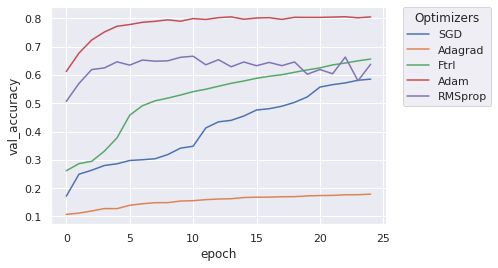

In [35]:
optimizers = []
for exp, result in zip([opt_SGD, opt_Adagrad, opt_Ftrl, opt_Adam, opt_RMSprop], ["SGD", "Adagrad", "Ftrl", "Adam", "RMSprop"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Optimizer'] = result
    optimizers.append(df)
df = pd.concat(optimizers)
df['Optimizer'] = df['Optimizer'].astype('str')

sns.set(style="darkgrid")
sns.lineplot(x='epoch', y='val_accuracy', hue = 'Optimizer', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title = 'Optimizers')

The Adam optimizer yeilds the highest accuracy afte 25 epochs with a learning rate of 0.001 and a batch size of 32. Now I will try a couple more itertations with Adam with larger and smaller batches and a higher and lower learning rate.

## Adam with lower and higher learning rates

In [22]:
lr = 0.01
model = create_model(lr = lr, opt = Adam)
lr_big = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.5067 - accuracy: 0.0996 - val_loss: 2.3035 - val_accuracy: 0.1001
Epoch 2/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0982 - val_loss: 2.3031 - val_accuracy: 0.1001
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.1005 - val_loss: 2.3030 - val_accuracy: 0.1001
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3042 - accuracy: 0.0994 - val_loss: 2.3031 - val_accuracy: 0.1001
Epoch 5/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.1005 - val_loss: 2.3041 - val_accuracy: 0.1001
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3041 - accuracy: 0.0979 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0989 - val_loss: 2.3038 - val_accuracy:

In [23]:
lr = 0.0001
model = create_model(lr = lr, opt = Adam)
lr_tiny = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 5s 2ms/step - loss: 4.2894 - accuracy: 0.1433 - val_loss: 2.2226 - val_accuracy: 0.1579
Epoch 2/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.1666 - accuracy: 0.1755 - val_loss: 2.1312 - val_accuracy: 0.1937
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.0143 - accuracy: 0.2459 - val_loss: 1.9524 - val_accuracy: 0.2752
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.8798 - accuracy: 0.3069 - val_loss: 1.8302 - val_accuracy: 0.3621
Epoch 5/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.7228 - accuracy: 0.3828 - val_loss: 1.6840 - val_accuracy: 0.4112
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.5866 - accuracy: 0.4399 - val_loss: 1.5637 - val_accuracy: 0.4510
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.4606 - accuracy: 0.4880 - val_loss: 1.4615 - val_accuracy:

Neither attempt at adjusting the learnign rate yeided a better accuruacy. Now I will try with smaller batch sizes. 

In [24]:
lr = 0.001
model = create_model(lr = lr, opt = Adam)
bt_tiny = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=16,
    validation_data=(X_val,y_val))

Epoch 1/25
4000/4000 [==============================] - 9s 2ms/step - loss: 1.5984 - accuracy: 0.5232 - val_loss: 1.1048 - val_accuracy: 0.6395
Epoch 2/25
4000/4000 [==============================] - 9s 2ms/step - loss: 0.9803 - accuracy: 0.6954 - val_loss: 0.8301 - val_accuracy: 0.7492
Epoch 3/25
4000/4000 [==============================] - 9s 2ms/step - loss: 0.8208 - accuracy: 0.7521 - val_loss: 0.7922 - val_accuracy: 0.7663
Epoch 4/25
4000/4000 [==============================] - 9s 2ms/step - loss: 0.7581 - accuracy: 0.7746 - val_loss: 0.7504 - val_accuracy: 0.7785
Epoch 5/25
4000/4000 [==============================] - 9s 2ms/step - loss: 0.7267 - accuracy: 0.7845 - val_loss: 0.7216 - val_accuracy: 0.7889
Epoch 6/25
4000/4000 [==============================] - 9s 2ms/step - loss: 0.6984 - accuracy: 0.7934 - val_loss: 0.7167 - val_accuracy: 0.7897
Epoch 7/25
4000/4000 [==============================] - 9s 2ms/step - loss: 0.6721 - accuracy: 0.8004 - val_loss: 0.6962 - val_accuracy:

In [25]:
lr = 0.001
model = create_model(lr = lr, opt = Adam)
bt_itty_bitty = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=8,
    validation_data=(X_val,y_val))

Epoch 1/25
8000/8000 [==============================] - 17s 2ms/step - loss: 1.6262 - accuracy: 0.4650 - val_loss: 1.1443 - val_accuracy: 0.6107
Epoch 2/25
8000/8000 [==============================] - 17s 2ms/step - loss: 1.0585 - accuracy: 0.6419 - val_loss: 1.0127 - val_accuracy: 0.6534
Epoch 3/25
8000/8000 [==============================] - 19s 2ms/step - loss: 0.9732 - accuracy: 0.6744 - val_loss: 0.9907 - val_accuracy: 0.6728
Epoch 4/25
8000/8000 [==============================] - 18s 2ms/step - loss: 0.9303 - accuracy: 0.6919 - val_loss: 0.9192 - val_accuracy: 0.6988
Epoch 5/25
8000/8000 [==============================] - 17s 2ms/step - loss: 0.8915 - accuracy: 0.7072 - val_loss: 0.8498 - val_accuracy: 0.7199
Epoch 6/25
8000/8000 [==============================] - 17s 2ms/step - loss: 0.8371 - accuracy: 0.7257 - val_loss: 0.8467 - val_accuracy: 0.7272
Epoch 7/25
8000/8000 [==============================] - 17s 2ms/step - loss: 0.8143 - accuracy: 0.7358 - val_loss: 0.8500 - val_ac

No improvement on overall model accuracy was found. Also, the fitting of these models were 
considerably slower than previous iterations. 
Lastly, I will try to increase the number of 
epochs to see what peak accuracy can be found with the best parameters found. 

In [36]:
lr = 0.001
model = create_model(lr = lr, opt = Adam)
opt_Adam_30 = model.fit(
    X_train, y_train, 
    epochs=30,
    batch_size=64,
    validation_data=(X_val,y_val))

Epoch 1/30
1000/1000 [==============================] - 2s 2ms/step - loss: 2.1122 - accuracy: 0.3899 - val_loss: 1.3675 - val_accuracy: 0.5527
Epoch 2/30
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1960 - accuracy: 0.5820 - val_loss: 1.0956 - val_accuracy: 0.6244
Epoch 3/30
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0247 - accuracy: 0.6589 - val_loss: 0.9211 - val_accuracy: 0.6953
Epoch 4/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8873 - accuracy: 0.7073 - val_loss: 0.8470 - val_accuracy: 0.7176
Epoch 5/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8134 - accuracy: 0.7366 - val_loss: 0.7911 - val_accuracy: 0.7426
Epoch 6/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7693 - accuracy: 0.7520 - val_loss: 0.7706 - val_accuracy: 0.7556
Epoch 7/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7371 - accuracy: 0.7660 - val_loss: 0.7618 - val_accuracy:

No major improvements found. 30 epochs is slightly better than 25, but after 30 it pretty much treads water

In [37]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_97 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_98 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_99 (Dense)             (None, 10)                170       
Total params: 26,874
Trainable params: 26,874
Non-trainable params: 0
_________________________________________________________________


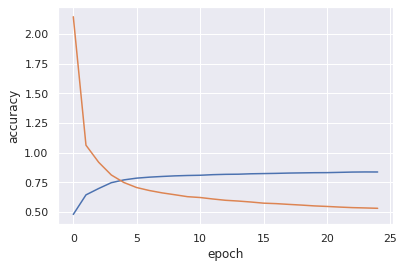

In [38]:
df = pd.DataFrame.from_records(opt_Adam.history)
df['epoch'] = [i for i in range(df.shape[0])]
sns.set(style="darkgrid")
ax = sns.lineplot(x='epoch', y='accuracy', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df)
plt.show()

In [39]:
model.evaluate(X_test, y_test)

625/625 [==============================] - 1s 2ms/step - loss: 0.6638 - accuracy: 0.8140


[0.6637628674507141, 0.8139500021934509]

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
As part of the neural network optimization process, the model wil run through forwards,
 evaluate the errors, and step backwards through the network adjusting the weights 
 between the neurons incrementally to reduce the error for the next run until the best set
  of wieghts is found. each run forwards and backwards making adjustments to the network is 
  known as an 'epoch'. The amount of change performed on each weight is independant of the
  others. The entire process of tuning these weights is known as 'backpropagation'.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


